# Caravan insurance challenge

## Machine Learning project checklist

1. Frame the problem and look at the big picture.
1. Get the data.
1. Explore the data to gain insights.
1. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
1. Explore many different models and short-list the best ones.
1. Fine-tune your models and combine them into a great solution.
1. Present your solution.
1. Launch, monitor, and maintain your system.

*From: Aurélien Géron. « Hands-On Machine Learning with Scikit-Learn and TensorFlow »*

## Frame the problem

**Can you predict who would be interested in buying a caravan insurance policy and give an explanation why?**

### Define the objective in business terms.

**The database contains information on customers of an insurance company.
The objective of the challenge is to predict who would be interested in buying a caravan insurance policy and give an explanation why?**

### How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

- Supervised learning to be able to predict if the customer will buy / not buy the insurance. With a decision tree or classification rules, I would be able to have a clear view on "who would be interested".
- Unsupervised to see if we can identify cluster of customers. Information gain and hierarchical clustering may help. ==> TODO not sure this is the best approach.

- Offline.

- Model-based.

### How should performance be measured?

Precision / recall tradeoff.
Not enough criteria to decide.
Let's take AUC or F1-score as the performance metric.

Possible hypothesis: if we want to use predictions to do a marketing campain, we prefer Precision rather than Recall. In that case Lift analysis can be useful. The baseline is to call people randomly, so in average we succeed 6% of time.

### What would be the minimum performance needed to reach the business objective?

In case of a marketing campain, we can take we want a model that predict the success on 50% of calls.

### How would you solve the problem manually?

Try to find patterns manually with data exploration.

### List the assumptions you (or others) have made so far.

TODO

## Setup

### Variables

### Lib

In [ ]:
from google.colab import drive



drive.mount('/content/drive')



os.chdir('/content/drive/My Drive')



datafile_path = "/content/drive/My Drive/Dataset/caravan-insurance-challenge.csv"



output_path = "/content/drive/My Drive/Images"





# Cost / benefit:



# Cost to call = -10



# Benefit = 100



# b(Y,p) = b(TP) = 100 - 10 = 90



# c(N,p) = c(FN) = 0
# c(Y,n) = c(FP) = -10
# b(N,n) = b(TN) = 0
TP_amount = 90
FN_amount = 0
FP_amount = -10

TN_amount = 0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
# Save figures
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, output_path, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Get data
### Quick look at the data structure

In [ ]:
data_all = pd.read_csv('/content/drive/My Drive/Dataset/caravan-insurance-challenge.csv')
data_all.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data_all.info()
# data_all.list() # List all columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

In [ ]:
data_all["ORIGIN"].value_counts()

train    5822
test     4000
Name: ORIGIN, dtype: int64

In [ ]:
data_all.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,0.873142,2.286602,1.887294,3.237324,4.302891,1.484525,3.307269,4.592038,1.898799,0.403278,0.545714,2.877113,2.226532,2.291183,1.650682,1.595093,2.204744,3.742211,1.068214,4.187742,4.819487,6.022501,1.335980,1.956730,6.254327,2.750662,2.577072,3.505498,2.739462,0.808491,...,2.956424,0.054877,0.170841,0.008858,0.019344,0.093565,0.011505,0.215027,0.202301,0.011505,0.018733,0.023315,1.849420,0.001629,0.015272,0.025351,0.016697,0.045408,0.400020,0.014050,0.021279,0.557218,0.011098,0.040216,0.002240,0.011403,0.034413,0.005192,0.071065,0.079821,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,0.961955,1.710674,1.779238,1.609139,1.984152,1.645968,1.723377,2.279839,1.814406,0.786792,1.106349,1.846703,1.748025,1.684008,1.742410,1.321487,1.534163,1.944900,1.298229,3.093127,3.093541,1.543980,1.213627,1.596842,2.000374,2.002960,2.073125,1.871365,1.950625,1.173771,...,2.921736,0.566108,0.888518,0.237556,0.200885,0.604350,0.215408,0.810899,0.910574,0.188699,0.213712,0.375350,1.881271,0.057058,0.244210,0.157198,0.211487,0.396983,0.492001,0.126058,0.144319,0.608575,0.129928,0.223622,0.068402,0.116251,0.249706,0.109954,0.267432,0.384431,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#data_all.hist(bins=20, figsize=(50,40))
#save_fig("attributes_histogram_plots")
# plt.show()

### Create the test set

In [ ]:
data_train = data_all.loc[data_all['ORIGIN'] == 'train']
data_test = data_all.loc[data_all['ORIGIN'] != 'train']
print(len(data_train), "train +", len(data_test), "test")

5822 train + 4000 test


In [ ]:
# Remove the "ORIGIN" attribute, not needed anymore
data_train = data_train.drop("ORIGIN", axis=1)
data_test = data_test.drop("ORIGIN", axis=1)

### Conclusion
- **Be careful, almost all attributes are not numerical but categorical (ordinal for most of them)!**
- It seems we have no missing variables.
- **One big challenge with this dataset is probably the number of attribute.**

## Explore data

In [ ]:
# Create a copy of the training set we can modify
data = data_train.copy()

*Study each attribute and its characteristics.*

**TODO More than 80 attributes to study... Difficult to deal with, what is the best way to handle this huge number of attributes?**

In [ ]:
# What is the proportion of CARAVAN
data['CARAVAN'].value_counts()
# TODO Print proportion instead

0    5474
1     348
Name: CARAVAN, dtype: int64

In [ ]:
# Scatter plot
corr_matrix = data.corr()

In [ ]:
corr_matrix["CARAVAN"].sort_values(ascending=False)

CARAVAN     1.000000
PPERSAUT    0.150910
APERSAUT    0.144210
APLEZIER    0.105700
PWAPART     0.096463
              ...   
MOSTYPE    -0.069385
MAUT0      -0.076501
MHHUUR     -0.079143
MINKM30    -0.079765
MOPLLAAG   -0.090561
Name: CARAVAN, Length: 86, dtype: float64

In [ ]:
'''
from pandas.plotting import scatter_matrix

attributes = ["CARAVAN", "PPERSAUT", "APERSAUT", "APLEZIER", "PWAPART", "MKOOPKLA", "PBRAND", "PPLEZIER", "MINKGEM", "MOPLLAAG"]
scatter_matrix(data[attributes], figsize=(20, 20))
save_fig("scatter_matrix_plot")
'''

'\nfrom pandas.plotting import scatter_matrix\n\nattributes = ["CARAVAN", "PPERSAUT", "APERSAUT", "APLEZIER", "PWAPART", "MKOOPKLA", "PBRAND", "PPLEZIER", "MINKGEM", "MOPLLAAG"]\nscatter_matrix(data[attributes], figsize=(20, 20))\nsave_fig("scatter_matrix_plot")\n'

In [ ]:
from pandas.plotting import parallel_coordinates

#plt.figure()
#parallel_coordinates(data, 'CARAVAN')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.scatter(data["PPERSAUT"], data["APERSAUT"], c = data["CARAVAN"], alpha=0.8)
#plt.legend()
#plt.grid(True)
# save_fig("XXX")
#plt.show()

In [ ]:
#data.plot.scatter(x='PPERSAUT', y='APERSAUT', c='CARAVAN', label='TestThomas', figsize=(8,5), s=50, alpha=1)

### Experimenting with Attribute Combinations

### Conclusion

- **Many attributes, not easy to deal with. We will try to create a model with all attributes for now.**
- **All variables are Ordinal (meaning Categorical but there is an order) except "MOSTYPE" and "MOSHOOFD", which are Nominal.**

## Prepare data

In [ ]:
target_name = ["NO_INS", "HAS_INS"]
target_columns = ["CARAVAN"]
# y_train = data_train[target_name].copy().values # to convert the dataframe to a NumPy array
y_train = data_train[target_columns].copy()
data = data_train.drop(target_columns, axis=1) # drop labels for training set

In [ ]:
y_test = data_test[target_columns].copy()
data_test = data_test.drop(target_columns, axis=1)

### Data Cleaning

- Manage outliers -> TODO
- Manage missing values -> OK

### Manual feature selection
TODO: clearly something on which I must invest time to simplify the model and improve the accuracy.
See http://scikit-learn.org/stable/modules/feature_selection.html or https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### Feature engineering

#### Handling Text and Categorical attributes

In [ ]:
# Dummification of "MOSTYPE" and "MOSHOOFD" nominal attributes
# TODO Ignore them for the first round !!!
cat_attributes = ["MOSTYPE", "MOSHOOFD"]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer

# Pipeline for categorical attributes
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attributes)),
        ('label_binarizer', LabelBinarizer()),
    ])

#### Handling Numerical attributes

In [ ]:
# Numerical attributes
data_num = data.drop(cat_attributes, axis=1)
num_attributes = list(data_num)
#num_attributes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Pipeline for numerical attributes
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attributes)),
        ('SimpleImputer', SimpleImputer(strategy="median")),
        ('std_scaler', MinMaxScaler()), # Not necessary for Decision Tree, add this as a parameter to keep that option
#        ('std_scaler', StandardScaler()),
    ])

#### Add promising transformations / aggregate features

### Create prepared training set

In [ ]:
from sklearn.pipeline import Pipeline

# Union of features created by previous pipelines
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

# TODO Categorical attributes need to be managed properly
full_pipeline = num_pipeline

In [ ]:
X_train = full_pipeline.fit_transform(data)

In [ ]:
# Be careful I only selected num_attributes here
features_name = num_attributes

In [ ]:
# Check the shape of the prepared data
X_train.shape

(5822, 83)

In [ ]:
# Mandatory to transform y_train into a shape accepted by cross_val_score and cross_val_predict methods, with only 1 dimension
c, r = y_train.values.shape
print(c, r)
y_train_old = y_train
y_train = y_train.values.reshape(c,)

5822 1


### Create prepared test set

In [ ]:
X_test = full_pipeline.transform(data_test)
X_test.shape

(4000, 83)

In [ ]:
# Mandatory to transform y_train into a shape accepted by cross_val_score and cross_val_predict methods, with only 1 dimension
c, r = y_test.values.shape
print(c, r)
y_test = y_test.values.reshape(c,)

4000 1


### Automatic feature selection

#### Tree-based feature selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

print("Initial shape: ", X_train.shape)

clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
print("New shape: ", X_new.shape)

sorted(zip(clf.feature_importances_, features_name), reverse=True)

Initial shape:  (5822, 83)
New shape:  (5822, 42)


[(0.06942303940579402, 'PBRAND'),
 (0.056777444397949, 'PPERSAUT'),
 (0.045068172244672515, 'APERSAUT'),
 (0.03948496081324136, 'MKOOPKLA'),
 (0.02943138458966427, 'ABRAND'),
 (0.027667767226632063, 'PWAPART'),
 (0.02074074127186627, 'AWAPART'),
 (0.016906216454684934, 'MBERMIDD'),
 (0.016727861709937217, 'MOPLLAAG'),
 (0.016721301187917613, 'MOPLMIDD'),
 (0.016191483903016446, 'MOPLHOOG'),
 (0.016046641943143498, 'MGODGE'),
 (0.01604173502959112, 'MFGEKIND'),
 (0.015576700755480875, 'MSKC'),
 (0.015442995754183831, 'MINK3045'),
 (0.015399774543333373, 'MBERARBG'),
 (0.015145483882921484, 'MFWEKIND'),
 (0.01509761315633891, 'MINK4575'),
 (0.01494890081717579, 'MSKB1'),
 (0.01493839482380741, 'MBERARBO'),
 (0.014890744621079626, 'MHHUUR'),
 (0.014871786210937522, 'MINKGEM'),
 (0.01474442207209711, 'MSKA'),
 (0.014686403195620378, 'MGODOV'),
 (0.014437538279140698, 'MINKM30'),
 (0.014420326193666287, 'MGODPR'),
 (0.01414785954824251, 'MSKB2'),
 (0.014107783529179251, 'MRELGE'),
 (0.01409

#### Feature selection with recursive feature elimination

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress thi

Optimal number of features : 5


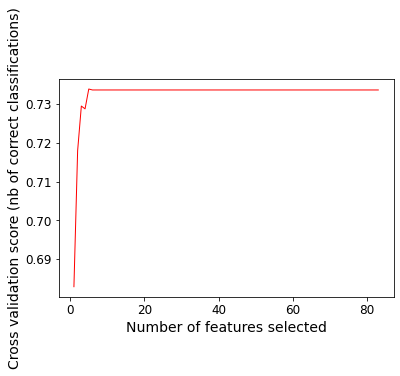

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

# Create the RFE object and compute a cross-validated score.
#clf_dt = DecisionTreeClassifier()
svc = SVC(kernel="linear")
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10, max_leaf_nodes=None, min_impurity_decrease=0, min_impurity_split=None, min_samples_leaf=0.1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=dt, step=1, cv=StratifiedKFold(3),
              scoring='roc_auc', verbose = 0)
rfecv.fit(X_train, y_train)

# print(rfecv.ranking_)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
# data_prepared_df.columns[rfecv.support_]

#### Univariate feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

KBest = SelectKBest(chi2, k=20)
X_new = KBest.fit_transform(X_train, y_train)
sorted(zip(KBest.scores_, features_name), reverse=True)

[(47.58646350766274, 'PPERSAUT'),
 (36.04418966987095, 'APLEZIER'),
 (31.949407652298117, 'PPLEZIER'),
 (21.513776001146248, 'PWAPART'),
 (16.138631949080224, 'PBYSTAND'),
 (14.00580212778908, 'AWAPART'),
 (13.061632037074508, 'ABYSTAND'),
 (12.54157326198014, 'PBRAND'),
 (11.251117273784788, 'APERSAUT'),
 (9.527705575106664, 'MKOOPKLA'),
 (9.125613485077949, 'MHHUUR'),
 (8.352663327516815, 'MOPLHOOG'),
 (7.9598151963798145, 'MHKOOP'),
 (7.601619672963379, 'PGEZONG'),
 (6.958177616719548, 'MINKM30'),
 (6.5098651470372735, 'AGEZONG'),
 (6.126831193662437, 'MOPLLAAG'),
 (5.912689033634445, 'ABROM'),
 (5.882928351122764, 'PBROM'),
 (4.94349674657201, 'MAUT0'),
 (4.776010223640633, 'MSKA'),
 (4.6750338094227395, 'MBERHOOG'),
 (4.672956053271597, 'PFIETS'),
 (4.638353171185632, 'PWAOREG'),
 (4.093653434011674, 'MSKD'),
 (4.033935243000773, 'MBERBOER'),
 (3.994726026342571, 'AZEILPL'),
 (3.6853190429876337, 'MINK7512'),
 (3.250856047523577, 'MRELOV'),
 (3.168910968090792, 'AFIETS'),
 (3.1301

### Recreate the DataFrame

In [ ]:
# Transform the Numpy array into a Pandas DataFrame
data_prepared_df = pd.DataFrame(X_train, columns = num_attributes, index = list(data_num.index.values))
data_prepared_df.head()
#data_prepared_df.columns.values

,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,...,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.0,0.50,0.2,0.000000,0.555556,0.2,0.333333,0.777778,0.000000,0.222222,0.111111,0.222222,0.666667,0.111111,0.222222,0.777778,0.111111,0.0,0.111111,0.222222,0.555556,0.222222,0.111111,0.111111,0.222222,0.666667,0.111111,0.111111,0.888889,0.888889,0.000000,0.111111,0.888889,0.111111,0.000000,0.444444,0.555556,0.000000,0.0,0.444444,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
1,0.0,0.25,0.2,0.111111,0.444444,0.2,0.444444,0.666667,0.285714,0.222222,0.000000,0.444444,0.555556,0.000000,0.555556,0.444444,0.000000,0.0,0.000000,0.555556,0.000000,0.444444,0.000000,0.222222,0.333333,0.555556,0.000000,0.222222,0.777778,0.777778,0.142857,0.222222,0.666667,0.333333,0.222222,0.000000,0.555556,0.222222,0.0,0.555556,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
2,0.0,0.25,0.2,0.000000,0.444444,0.4,0.444444,0.333333,0.285714,0.444444,0.444444,0.444444,0.222222,0.000000,0.555556,0.444444,0.000000,0.0,0.000000,0.777778,0.000000,0.222222,0.000000,0.555556,0.000000,0.444444,0.000000,0.777778,0.222222,0.777778,0.000000,0.222222,1.000000,0.000000,0.444444,0.555556,0.000000,0.000000,0.0,0.333333,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
3,0.0,0.50,0.4,0.222222,0.333333,0.4,0.444444,0.555556,0.285714,0.222222,0.222222,0.333333,0.444444,0.333333,0.444444,0.222222,0.444444,0.0,0.000000,0.333333,0.111111,0.222222,0.333333,0.222222,0.111111,0.444444,0.000000,0.555556,0.444444,1.000000,0.000000,0.000000,0.777778,0.222222,0.111111,0.555556,0.333333,0.000000,0.0,0.444444,...,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
4,0.0,0.75,0.2,0.111111,0.444444,0.2,0.444444,0.777778,0.142857,0.222222,0.222222,0.444444,0.444444,0.555556,0.444444,0.000000,0.000000,1.0,0.444444,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.555556,0.666667,0.285714,0.111111,0.555556,0.444444,0.000000,0.000000,1.000000,0.000000,0.0,0.666667,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0


## Select and train a model

### Utility functions

In [ ]:
# Display scores
def display_scores(scores):
    print('Scores:                        ', scores)
    print('Mean:                          '+"{:.2f}".format(scores.mean()))
    print('Standard deviation:            '+"{:.2f}".format(scores.std()))

In [ ]:
# Display confusion matrix
def display_conf_matrix(y_train, y_pred):
    # Confusion matrix: row -> actual, column -> predicted
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_train, y_pred))

In [ ]:
# Precision, recall, AUC, F1-score
def display_perf_metrics(y_train, y_pred, y_proba):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, cohen_kappa_score
    print('Accuracy           '+"{:.2f}".format(accuracy_score(y_train, y_pred)*100)+'%')
    print('Precision          '+"{:.2f}".format(precision_score(y_train, y_pred)*100)+'%')
    print('Recall             '+"{:.2f}".format(recall_score(y_train, y_pred)*100)+'%')
    print('F1                 '+"{:.2f}".format(f1_score(y_train, y_pred)))
    print('AUC                '+"{:.2f}".format(roc_auc_score(y_train, y_proba)))
    print('Cohen Kappa        '+"{:.2f}".format(cohen_kappa_score(y_train, y_pred)))

In [ ]:
# Plot precision / recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

In [ ]:
# Plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    from sklearn.metrics import auc
    plt.plot(fpr, tpr, linewidth=2, label=(label + ' (area = %0.2f)' % auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [ ]:
# Plot precision and recall vs threashold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
# Profit calculation
def calculate_profit(cm, FN_amount, TP_amount, TN_amount, FP_amount):
    # cm: confusion matrix
    # FN_amount: benefit when false negative
    # TP_amount: benefit when true positive
    # TN_amount: benefit when true negative
    # FP_amount: benefit when false positive
    return (cm[0][0]*TN_amount + cm[1][0]*FN_amount + cm[0][1]*FP_amount +
                   cm[1][1]*TP_amount)

In [ ]:
# Create ranking and profit data frame
def create_ranking_profit_df(name, y_actual, y_proba):
    # Write a CSV file with results
    df_scores = pd.DataFrame({
            'score': y_proba[:,1],
            'actual': y_actual,
        })
    
    df_scores = df_scores.sort_values("score", ascending = False)
    df_scores["profit"] = (TP_amount - FP_amount) * df_scores["actual"] + FP_amount
    df_scores["cum_profit"] = df_scores["profit"].cumsum(axis = 0)
    # print(df_scores["cum_profit"].values)
    # print(ranking_dt.head())
    
    # Save a copy of the dataframe
    path = os.path.join(PROJECT_ROOT_DIR, output_path, "df_ranking_profit_" + name + ".csv")
    df_scores.to_csv(path)
    
    return df_scores

In [ ]:
# Plot profit curve
def plot_profit_curve(name, df_scores):
    plt.plot(df_scores["cum_profit"].values, linewidth=1, label=name + " Profit curve")
    plt.plot([0, 0], [0, 1], 'k--')
    plt.legend(loc="lower left")
    plt.xlabel('Number of test instances', fontsize=16)
    plt.ylabel('Profit', fontsize=16)
    plt.grid(True)

### Decision Tree

Tips for decision tree: http://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use

- Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.
- Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.
- Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.

In [ ]:
# Create the model
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print(X_train.shape)
print(y_train.shape)

(5822, 83)
(5822,)


In [ ]:
# Use 10-fold cross validation to have a first view on model accuracy
# data_predicted = model_dtree.predict(data_scaled)
from sklearn.model_selection import cross_val_score
score_dt = cross_val_score(clf_dt, X_train, y_train, cv=10, scoring="roc_auc", n_jobs=1)

In [ ]:
# Prediction
from sklearn.model_selection import cross_val_predict
y_pred_dt = cross_val_predict(clf_dt, X_train, y_train, cv=10, n_jobs=-1)
# predict_proba is the method to call on the DecisionTree classifier (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba)
y_proba_dt = cross_val_predict(clf_dt, X_train, y_train, cv=10, method='predict_proba', n_jobs=-1)

In [ ]:
print(y_pred_dt)
print(y_proba_dt)
print(score_dt)

[0 0 0 ... 0 0 0]
[[0.87605295 0.12394705]
 [0.96470588 0.03529412]
 [0.94117647 0.05882353]
 ...
 [0.91446613 0.08553387]
 [0.91446613 0.08553387]
 [0.97551546 0.02448454]]
[0.73534932 0.74366528 0.63933018 0.68800988 0.75301645 0.65207626
 0.73674589 0.67662575 0.71681901 0.78662836]


In [ ]:
# Write a CSV file with results
df_y_proba_dt = pd.DataFrame({
        'score': y_proba_dt[:,1],
        'actual': y_train,
        'pred': y_pred_dt
    })
#print(df_y_proba_dt.sort_values('score', axis=0, ascending=False))
df_y_proba_dt.to_csv('Images/y_proba_dt.csv')

In [ ]:
# Precision, recalls and thresholds
from sklearn.metrics import precision_recall_curve
precisions_dt, recalls_dt, thresholds_dt = precision_recall_curve(y_train, y_proba_dt[:,1])
print(precisions_dt)
print(recalls_dt)
print(thresholds_dt)

[0.05977327 0.05965274 0.06049885 0.06210162 0.0638505  0.06630525
 0.06922904 0.07221273 0.07645341 0.08194809 0.08960573 0.09937888
 0.10340776 0.11031579 0.11150442 0.11327762 0.11540342 0.11831863
 0.12243767 0.12357528 0.12658228 0.1295578  0.13707452 0.14950166
 0.15320665 0.15547264 0.16361257 0.16918429 0.17825312 0.19279661
 0.21465969 0.21798365 0.22580645 0.23030303 0.23616236 0.23478261
 0.2371134  0.22941176 0.23529412 0.24770642 0.28       0.29577465
 0.28846154 0.30555556 0.36842105 0.46666667 0.42857143 0.33333333
 0.         1.        ]
[1.         0.99712644 0.98275862 0.97988506 0.94252874 0.9137931
 0.88505747 0.85057471 0.82758621 0.80747126 0.79022989 0.7816092
 0.75862069 0.75287356 0.72413793 0.70114943 0.67816092 0.65517241
 0.63505747 0.59195402 0.54597701 0.47988506 0.42816092 0.38793103
 0.37068966 0.3591954  0.3591954  0.32183908 0.28735632 0.26149425
 0.23563218 0.22988506 0.22126437 0.2183908  0.18390805 0.15517241
 0.13218391 0.11206897 0.09195402 0.0775

In [ ]:
# Display scores
display_scores(score_dt)
display_conf_matrix(y_train, y_pred_dt)
display_perf_metrics(y_train, y_pred_dt, y_proba_dt[:,1])

Scores:                         [0.73534932 0.74366528 0.63933018 0.68800988 0.75301645 0.65207626
 0.73674589 0.67662575 0.71681901 0.78662836]
Mean:                          0.71
Standard deviation:            0.04
[[5470    4]
 [ 345    3]]
Accuracy           94.01%
Precision          42.86%
Recall             0.86%
F1                 0.02
AUC                0.71
Cohen Kappa        0.01


In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_dt, target_names=target_name))

              precision    recall  f1-score   support

      NO_INS       0.94      1.00      0.97      5474
     HAS_INS       0.43      0.01      0.02       348

    accuracy                           0.94      5822
   macro avg       0.68      0.50      0.49      5822
weighted avg       0.91      0.94      0.91      5822



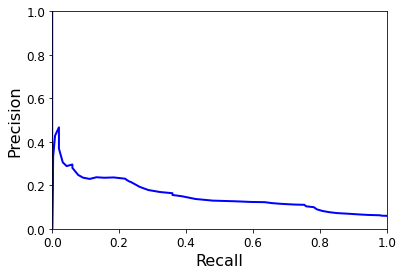

In [ ]:
# Plot precision / recall
#plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_dt, recalls_dt)
plt.show()

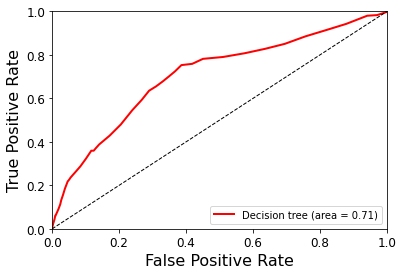

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_proba_dt[:,1])

#plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, "Decision tree")
plt.show()

### Try with SVM, Logistic Regression, Random Forrest and Votting classifier

In [ ]:
# Create classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf_log = LogisticRegression(n_jobs=-1, random_state = 42)
clf_rf = RandomForestClassifier(n_jobs=-1, random_state = 42)
clf_svm = SVC(kernel = 'rbf', probability = True, random_state = 42)

clf_voting = VotingClassifier(
    estimators=[('lr', clf_log), ('rf', clf_rf), ('svc', clf_svm)],
    voting='soft')

# Create a dataframe to manage the different classifiers
clf_list_values = [ ('Decision Tree', clf_dt),
                    ('Logistic Regression', clf_log),
                    ('Random Forrest', clf_rf),
                    ('SVM', clf_svm),
                    ('Voting LR, SVM, RF', clf_voting)
                ]
clf_list = pd.DataFrame.from_records(clf_list_values, columns=['name', 'clf'])

       Models Performance       
--------------------------------
---  DecisionTreeClassifier  ---
Accuracy           94.01%
Precision          42.86%
Recall             0.86%
F1                 0.02
AUC                0.71
Cohen Kappa        0.01
[[5470    4]
 [ 345    3]]
---  LogisticRegression  ---
Accuracy           93.99%
Precision          33.33%
Recall             0.57%
F1                 0.01
AUC                0.74
Cohen Kappa        0.01
[[5470    4]
 [ 346    2]]
---  RandomForestClassifier  ---
Accuracy           92.46%
Precision          13.60%
Recall             4.89%
F1                 0.07
AUC                0.69
Cohen Kappa        0.04
[[5366  108]
 [ 331   17]]
---  SVC  ---
Accuracy           94.02%
Precision          0.00%
Recall             0.00%
F1                 0.00
AUC                0.63
Cohen Kappa        0.00
[[5474    0]
 [ 348    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---  VotingClassifier  ---
Accuracy           94.01%
Precision          0.00%
Recall             0.00%
F1                 0.00
AUC                0.74
Cohen Kappa        -0.00
[[5473    1]
 [ 348    0]]


NameError: ignored

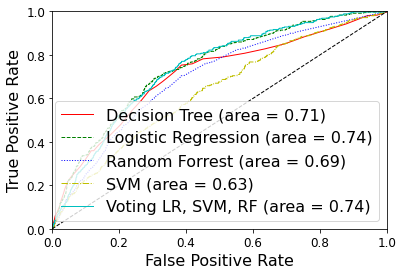

In [ ]:
from sklearn.metrics import roc_curve, auc
from cycler import cycler

print('       Models Performance       ')
print('--------------------------------')

# plt.figure(figsize=(8, 6))
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'c', 'm', 'y', 'k']) +
                           cycler('linestyle', ['-', '--', ':', '-.','-', '--', ':', '-.'])))

for index, row in clf_list.iterrows():
    name = row['name']
    clf = row['clf']
    clf.fit(X_train, y_train)
    y_pred = cross_val_predict(clf, X_train, y_train, cv=10, n_jobs=-1)
    y_proba = cross_val_predict(clf, X_train, y_train, cv=10, method='predict_proba', n_jobs=-1)
    print("--- ", clf.__class__.__name__, " ---")
    display_perf_metrics(y_train, y_pred, y_proba[:,1]) # TODO Fix issue with SVM on precision and F1 score...
    display_conf_matrix(y_train, y_pred)
    fpr, tpr, thresholds = roc_curve(y_train, y_proba[:,1])
    plt.plot(fpr, tpr, linewidth=1, label=name+" (area = %0.2f)" % auc(fpr, tpr))

#plot_roc_curve(fpr, tpr, "Decision tree")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
clf_rf
y_pred = cross_val_predict(clf_rf, X_train, y_train, cv=10, n_jobs=-1)
cm_rf_tmp = confusion_matrix(y_train, y_pred)
cm_rf_tmp

## Models fine-tuning (using grid and random search)

### Decision Tree

#### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = [
        {'max_depth': [5, 8, 10, 15, 20], 'max_features': [10, 20, 50, 80], 'min_samples_leaf': [0.0001, 0.001, 0.01, 0.1, 0.2]},
        #{'max_depth': [5, 50, 100], 'max_features': [10, 50], 'min_samples_leaf': [0.0001, 0.01, 0.1, 0.2]},
    ]

grid_search_dt = GridSearchCV(clf_dt, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("AUC= ", grid_search_dt.best_score_, grid_search_dt.best_params_)
grid_search_dt.best_estimator_

In [ ]:
cvres_grid = grid_search_dt.cv_results_
for mean_score, params in zip(cvres_grid["mean_test_score"], cvres_grid["params"]):
    print("AUC= ", mean_score, params)

In [ ]:
feature_importances_grid = grid_search_dt.best_estimator_.feature_importances_
sorted(zip(feature_importances_grid, features_name), reverse=True)

#### Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'max_depth': randint(low=4, high=20),
        'max_features': randint(low=10, high=80),
#        'max_leaf_nodes': randint(low=10, high=1000),
        'min_samples_leaf': randint(low=1, high=100)
    }

rnd_search = RandomizedSearchCV(clf_dt, param_distributions=param_distribs,
                                n_iter=200, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
#print(clf_dt.get_params().keys())
rnd_search.fit(X_train, y_train)

In [ ]:
print("AUC= ", rnd_search.best_score_, rnd_search.best_params_)
rnd_search.best_estimator_

In [ ]:
cvres_rnd = rnd_search.cv_results_
for mean_score, params in zip(cvres_rnd["mean_test_score"], cvres_rnd["params"]):
    print("AUC= ", mean_score, params)

In [ ]:
feature_importances_rnd = rnd_search.best_estimator_.feature_importances_
sorted(zip(feature_importances_rnd, features_name), reverse=True)

#### Best decision tree model

In [ ]:
clf_best_dt = grid_search_dt.best_estimator_
clf_best_dt

In [ ]:
y_pred_dt = cross_val_predict(clf_best_dt, X_train, y_train, cv=10, n_jobs=-1)
y_proba_dt = cross_val_predict(clf_best_dt, X_train, y_train, cv=10, method='predict_proba', n_jobs=-1)
ranking_profit_dt = create_ranking_profit_df("Decision Tree", y_train, y_proba_dt)

In [ ]:
ranking_profit_dt.head()

##### Performance metrics

In [ ]:
# Performance metrics
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_train, y_pred_dt)
display_conf_matrix(y_train, y_pred_dt)
display_perf_metrics(y_train, y_pred_dt, y_proba_dt[:,1])

##### Precision / recall curve

In [ ]:
# Precision, recalls and thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_dt[:,1])
#print(precisions)
#print(recalls)
#print(thresholds)

In [ ]:
# Plot precision / recall
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot_optimized_model_dt")
plt.show()

In [ ]:
# Plot precision and recall vs threshold
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

##### ROC curve

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_proba_dt[:,1])

#plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, "Decision tree")
save_fig("roc_curve_plot_optimized_model_dt")
plt.show()

### Logistic Regression

#### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = [
        {'solver' : ['newton-cg', 'lbfgs', 'sag'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] },
        {'solver' : ['liblinear'], 'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
    ]

grid_search_log = GridSearchCV(clf_log, param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search_log.fit(X_train, y_train)

print("Precision= ", grid_search_log.best_score_, grid_search_log.best_params_)
grid_search_log.best_estimator_

In [ ]:
# I can try to use my own scorer based on the max profit.
# from sklearn.metrics import make_scorer
# benefit_scorer = make_scorer(calculate_profit, greater_is_better=True)

In [ ]:
cvres_grid_log = grid_search_log.cv_results_
for mean_score, params in zip(cvres_grid_log["mean_test_score"], cvres_grid_log["params"]):
    print("Precision= ", mean_score, params)

#### Best logistic regression model

In [ ]:
clf_best_log = grid_search_log.best_estimator_
clf_best_log

In [ ]:
y_pred_log = cross_val_predict(clf_best_log, X_train, y_train, cv=10, n_jobs=-1)
y_proba_log = cross_val_predict(clf_best_log, X_train, y_train, cv=10, method='predict_proba', n_jobs=-1)
ranking_profit_log = create_ranking_profit_df("Logistic Regression", y_train, y_proba_log)

In [ ]:
ranking_profit_log.head()

##### Performance metrics

In [ ]:
# Performance metrics
cm_log = confusion_matrix(y_train, y_pred_log)
display_conf_matrix(y_train, y_pred_log)
display_perf_metrics(y_train, y_pred_log, y_proba_log[:,1])

##### Precision / recall curve

In [ ]:
# Precision, recalls and thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_log[:,1])
#print(precisions)
#print(recalls)
#print(thresholds)

In [ ]:
# Plot precision / recall
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot_optimized_model_dt")
plt.show()

In [ ]:
# Plot precision and recall vs threshold
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

##### ROC curve

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_proba_log[:,1])

#plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, "Decision tree")
save_fig("roc_curve_plot_optimized_model_dt")
plt.show()

### Random forest

#### Grid search

In [ ]:
# Select best features from previous decision tree
model = SelectFromModel(clf_best_dt, prefit=True)
X_new = model.transform(X_train)
print("Nb of features selected: ", X_new.shape)

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = [
        {'max_depth': [5, 8, 10, 15, 20], 'max_features': [5, 8, 13], 'min_samples_leaf': [0.0001, 0.001, 0.01, 0.1, 0.2]},
    ]

grid_search_rf = GridSearchCV(clf_rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_new, y_train)

print("F1= ", grid_search_rf.best_score_, grid_search_rf.best_params_)
clf_rf2 = grid_search_rf.best_estimator_
clf_rf2

In [ ]:
cvres_grid_rf = grid_search_rf.cv_results_
for mean_score, params in zip(cvres_grid_rf["mean_test_score"], cvres_grid_rf["params"]):
    print("F1= ", mean_score, params)

#### Best random forest model

In [ ]:
clf_best_rf = grid_search_rf.best_estimator_
clf_best_rf

In [ ]:
y_pred_rf = cross_val_predict(clf_best_rf, X_new, y_train, cv=10, n_jobs=-1)
y_proba_rf = cross_val_predict(clf_best_rf, X_new, y_train, cv=10, method='predict_proba', n_jobs=-1)
ranking_profit_rf = create_ranking_profit_df("Random Forest", y_train, y_proba_rf)

##### Performance metrics

In [ ]:
# Performance metrics
cm_rf = confusion_matrix(y_train, y_pred_rf)
display_conf_matrix(y_train, y_pred_rf)
display_perf_metrics(y_train, y_pred_rf, y_proba_rf[:,1])

##### Precision / recall curve

In [ ]:
# Precision, recalls and thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_rf[:,1])
#print(precisions)
#print(recalls)
#print(thresholds)

In [ ]:
# Plot precision / recall
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot_optimized_model_rf")
plt.show()

In [ ]:
# Plot precision and recall vs threshold
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
save_fig("precision_recall_vs_threshold_plot_optimized_model_rf")
plt.show()

##### ROC curve

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_proba_rf[:,1])

#plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, "Decision tree")
save_fig("roc_curve_plot_optimized_model_rf")
plt.show()

### Learning curves

#### Decision Tree

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#train_sizes, train_scores, valid_scores = learning_curve(
#    clf_best_rf, X_train, y_train, train_sizes=[50, 80, 110], cv=5)
#print(train_sizes)
#print(train_scores)
#print(valid_scores)

title = "Learning Curves (Decision Tree)"
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf_best_dt, title, X_train, y_train, (0.8, 1.01), cv=10, n_jobs=7, train_sizes=[ 0.1, 0.33, 0.55, 0.78, 1.])

plt.show()

The score could be better -> underfitting

#### Logistic Regression

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

title = "Learning Curves (Logistic Regression)"
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf_best_log, title, X_train, y_train, (0.8, 1.01), cv=10, n_jobs=1, train_sizes=[ 0.1, 0.33, 0.55, 0.78, 1.])

plt.show()

The score could be better -> underfitting

#### Random forest

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#plot_learning_curve(clf_best_rf, title, X_train, y_train, ylim=(0.8, 1.01), cv=cv, n_jobs=7)
plot_learning_curve(clf_best_rf, title, X_train, y_train, (0.8, 1.01), cv=10, n_jobs=7, train_sizes=[ 0.1, 0.33, 0.55, 0.78, 1.])

plt.show()

Overfitting. But I don't have enough data... Can try regularization...

## Cost / benefit matrix

Use a cost / benefit matrix to identify the best threshold.

In [ ]:
print(cm_dt)
print(cm_log)
print(cm_rf)

In [ ]:
print('Compare Profit from Models')
print('-------------------------------------')

Profit_DT = calculate_profit(cm_dt, FN_amount, TP_amount, TN_amount, FP_amount)
print('Decision Tree Profit:        ' + str(Profit_DT))

Profit_LOG = calculate_profit(cm_log, FN_amount, TP_amount, TN_amount, FP_amount)
print('Logistic Regression Profit:  ' + str(Profit_LOG))

Profit_RF = calculate_profit(cm_rf, FN_amount, TP_amount, TN_amount, FP_amount)
print('Random Forest Profit:        ' + str(Profit_RF))

## Profit curve

In [ ]:
# Plot profit curve
plt.figure(figsize=(8, 6))
plot_profit_curve("Decision tree", ranking_profit_dt)
plot_profit_curve("Logistic regression", ranking_profit_log)
plot_profit_curve("Random forest", ranking_profit_rf)
save_fig("profit_curve")
plt.show()

## Conclusion

**Most important features**

- PPERSAUT: Contribution car policies
- PBRAND: Contribution fire policies
- MOPLLAAG: Lower level education

Part 1.9 Cost / Benefit matrix gives an idea of the expected cost.

In [ ]:
y_pred_final = cross_val_predict(clf_best_dt, X_test, y_test, cv=10, n_jobs=-1)
y_proba_final = cross_val_predict(clf_best_dt, X_test, y_test, cv=10, method='predict_proba', n_jobs=-1)
ranking_profit_final = create_ranking_profit_df("Decision Tree", y_test, y_proba_final)

In [ ]:
ranking_profit_final

In [ ]:
plot_profit_curve("Decision tree on test set", ranking_profit_final)